In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import FinanceDataReader as fdr

In [3]:
df = fdr.DataReader('005930', '2020', '2022')

In [4]:
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921


In [5]:
df['Close'] / df['Close'].shift(1) -1

Date
2020-01-02         NaN
2020-01-03    0.005435
2020-01-06    0.000000
2020-01-07    0.005405
2020-01-08    0.017921
                ...   
2021-12-24    0.007509
2021-12-27   -0.003727
2021-12-28    0.001247
2021-12-29   -0.018680
2021-12-30   -0.006345
Name: Close, Length: 496, dtype: float64

In [6]:
df['Close'].pct_change(1)

Date
2020-01-02         NaN
2020-01-03    0.005435
2020-01-06    0.000000
2020-01-07    0.005405
2020-01-08    0.017921
                ...   
2021-12-24    0.007509
2021-12-27   -0.003727
2021-12-28    0.001247
2021-12-29   -0.018680
2021-12-30   -0.006345
Name: Close, Length: 496, dtype: float64

In [8]:
df['return'] = df['Change'] + 1

In [9]:
df

,Open,High,Low,Close,Volume,Change,return
Date,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,0.989247
2020-01-03,56000,56600,54900,55500,15422255,0.005435,1.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000,1.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405,1.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921,1.017921
...,...,...,...,...,...,...,...
2021-12-24,80200,80800,80200,80500,12086380,0.007509,1.007509
2021-12-27,80600,80600,79800,80200,10783368,-0.003727,0.996273
2021-12-28,80200,80400,79700,80300,18226325,0.001247,1.001247


In [11]:
df['return'].cumprod()

Date
2020-01-02    0.989247
2020-01-03    0.994624
2020-01-06    0.994624
2020-01-07    1.000000
2020-01-08    1.017921
                ...   
2021-12-24    1.442652
2021-12-27    1.437276
2021-12-28    1.439068
2021-12-29    1.412186
2021-12-30    1.403226
Name: return, Length: 496, dtype: float64

In [12]:
# 이동평균선

In [13]:
df['20ma'] = df['Close'].rolling(20).mean()
df['60ma'] = df['Close'].rolling(60).mean()
df

,Open,High,Low,Close,Volume,Change,return,20ma,60ma
Date,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,0.989247,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,1.005435,NaN,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,1.000000,NaN,NaN
2020-01-07,55700,56400,55600,55800,10009778,0.005405,1.005405,NaN,NaN
2020-01-08,56200,57400,55900,56800,23501171,0.017921,1.017921,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-12-24,80200,80800,80200,80500,12086380,0.007509,1.007509,76890.0,73046.666667
2021-12-27,80600,80600,79800,80200,10783368,-0.003727,0.996273,77285.0,73148.333333
2021-12-28,80200,80400,79700,80300,18226325,0.001247,1.001247,77735.0,73266.666667


<AxesSubplot:xlabel='Date'>

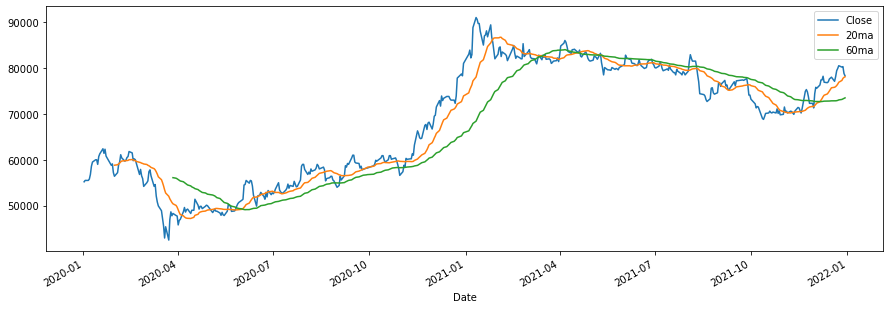

In [14]:
df[['Close', '20ma', '60ma']].plot(figsize=(15,5))

In [15]:
# 지수 이동평균선 : 현재와 가까운 값에 더 큰 가중치를 주어서 계산한 평균값

In [16]:
df['20ewma'] = df['Close'].ewm(span=20).mean()
df['60ewma'] = df['Close'].ewm(span=60).mean()

<AxesSubplot:xlabel='Date'>

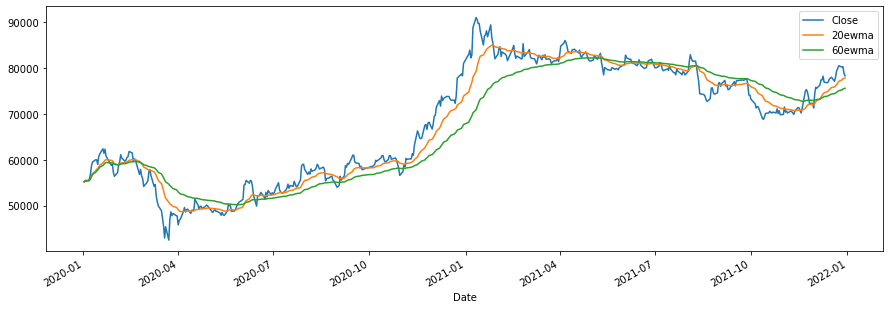

In [17]:
df[['Close', '20ewma', '60ewma']].plot(figsize=(15,5))

In [18]:
df['Close'].asfreq('D')

Date
2020-01-02    55200.0
2020-01-03    55500.0
2020-01-04        NaN
2020-01-05        NaN
2020-01-06    55500.0
               ...   
2021-12-26        NaN
2021-12-27    80200.0
2021-12-28    80300.0
2021-12-29    78800.0
2021-12-30    78300.0
Freq: D, Name: Close, Length: 729, dtype: float64

In [19]:
df['Close'].asfreq('4D')

Date
2020-01-02    55200.0
2020-01-06    55500.0
2020-01-10    59500.0
2020-01-14    60000.0
2020-01-18        NaN
               ...   
2021-12-14    77000.0
2021-12-18        NaN
2021-12-22    79400.0
2021-12-26        NaN
2021-12-30    78300.0
Freq: 4D, Name: Close, Length: 183, dtype: float64

In [21]:
df['Close'].resample('M').mean()

Date
2020-01-31    58815.000000
2020-02-29    59085.000000
2020-03-31    50168.181818
2020-04-30    49045.000000
2020-05-31    49100.000000
2020-06-30    52986.363636
2020-07-31    54726.086957
2020-08-31    56980.000000
2020-09-30    58176.190476
2020-10-31    59736.842105
2020-11-30    63419.047619
2020-12-31    73619.047619
2021-01-31    86565.000000
2021-02-28    83127.777778
2021-03-31    82072.727273
2021-04-30    83586.363636
2021-05-31    80521.052632
2021-06-30    81104.545455
2021-07-31    79577.272727
2021-08-31    77023.809524
2021-09-30    76305.263158
2021-10-31    70563.157895
2021-11-30    71536.363636
2021-12-31    77809.090909
Freq: M, Name: Close, dtype: float64

In [22]:
df['Close'].resample('Q').mean()

Date
2020-03-31    55833.870968
2020-06-30    50483.606557
2020-09-30    56562.500000
2020-12-31    65783.606557
2021-03-31    83886.666667
2021-06-30    81795.238095
2021-09-30    77709.677419
2021-12-31    73433.333333
Freq: Q-DEC, Name: Close, dtype: float64

In [23]:
df['Close'].resample('W').mean()

Date
2020-01-05    55350.0
2020-01-12    57240.0
2020-01-19    60200.0
2020-01-26    61725.0
2020-02-02    57875.0
               ...   
2021-12-05    73880.0
2021-12-12    77240.0
2021-12-19    77440.0
2021-12-26    79000.0
2022-01-02    79400.0
Freq: W-SUN, Name: Close, Length: 105, dtype: float64

In [ ]:
# bollinger band

In [24]:
df = fdr.DataReader('005930', '2020', '2023')

In [25]:
df.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-04-22,67200,67300,66700,67000,11791478,-0.010340
2022-04-25,66500,66700,66300,66300,11016474,-0.010448
2022-04-26,66400,66700,66100,66100,12946923,-0.003017
2022-04-27,65400,65500,64900,65000,18122084,-0.016641
2022-04-28,65400,65500,64500,64800,16701453,-0.003077


In [26]:
df['ma20'] = df['Close'].rolling(20).mean()

In [27]:
df.head()

,Open,High,Low,Close,Volume,Change,ma20
Date,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,NaN
2020-01-07,55700,56400,55600,55800,10009778,0.005405,NaN
2020-01-08,56200,57400,55900,56800,23501171,0.017921,NaN


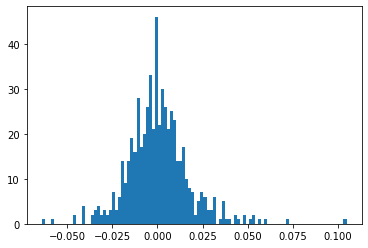

In [30]:
plt.hist(df.Change, bins=100)
plt.show()